In [34]:
#Importo dependencias.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve
from sklearn.ensemble import StackingRegressor
import joblib

In [35]:
#Extraigo los datos de internet y los cargo en dataframes de pandas.
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


In [36]:
#Agrego las etiquetas de cada feature al dataframe de inputs.
inputs = pd.DataFrame(data, columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])
inputs

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [37]:
#Agrego las etiquetas de cada feature al dataframe de labels.
labels = pd.DataFrame(target, columns=['MEDV'])
labels

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [38]:
#Uno dataframe de inputs y etiquetas para hacer exploración de los datos.
data = inputs.join(labels)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [39]:
#Analizo el tipo de datos de cada feature y busco datos faltantes.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [40]:
data['RAD'].value_counts()

RAD
24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: count, dtype: int64

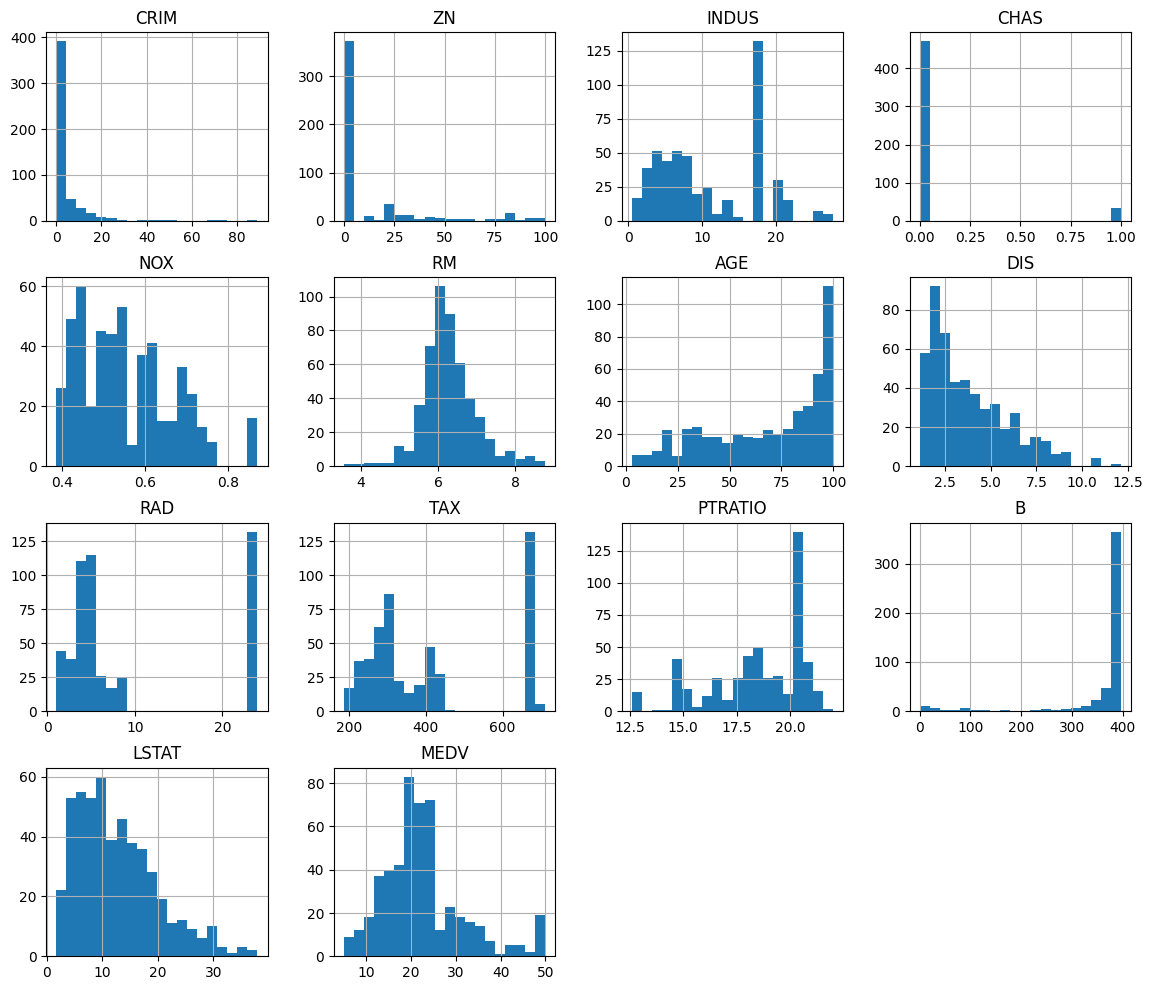

In [41]:
#Grafico histogramas para ver las distribuciones de los features.
data.hist(bins=20, figsize=(14,12))
plt.show()

In [42]:
#Obtengo resumen estadistico de los features.
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [43]:
#Calculo la correlación lineal de los features respecto a la etiqueta.
correlationMatrix = data.corr()
correlationMatrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

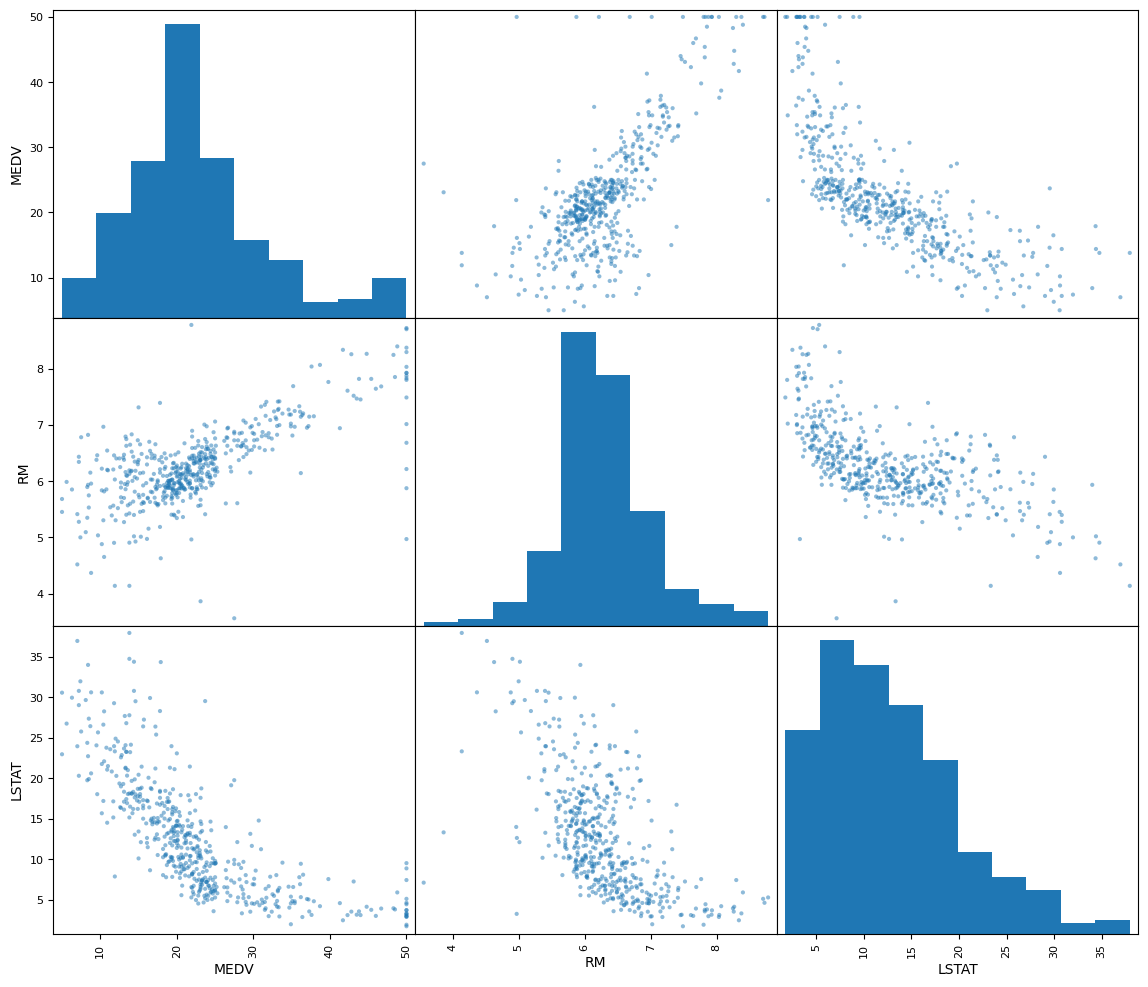

In [44]:
#Represento graficamente las correlciones de los features que mas llamaron la atencion

atributes = ['MEDV','RM','LSTAT']
scatter_matrix(data[atributes], figsize=(14,12))
plt.show()

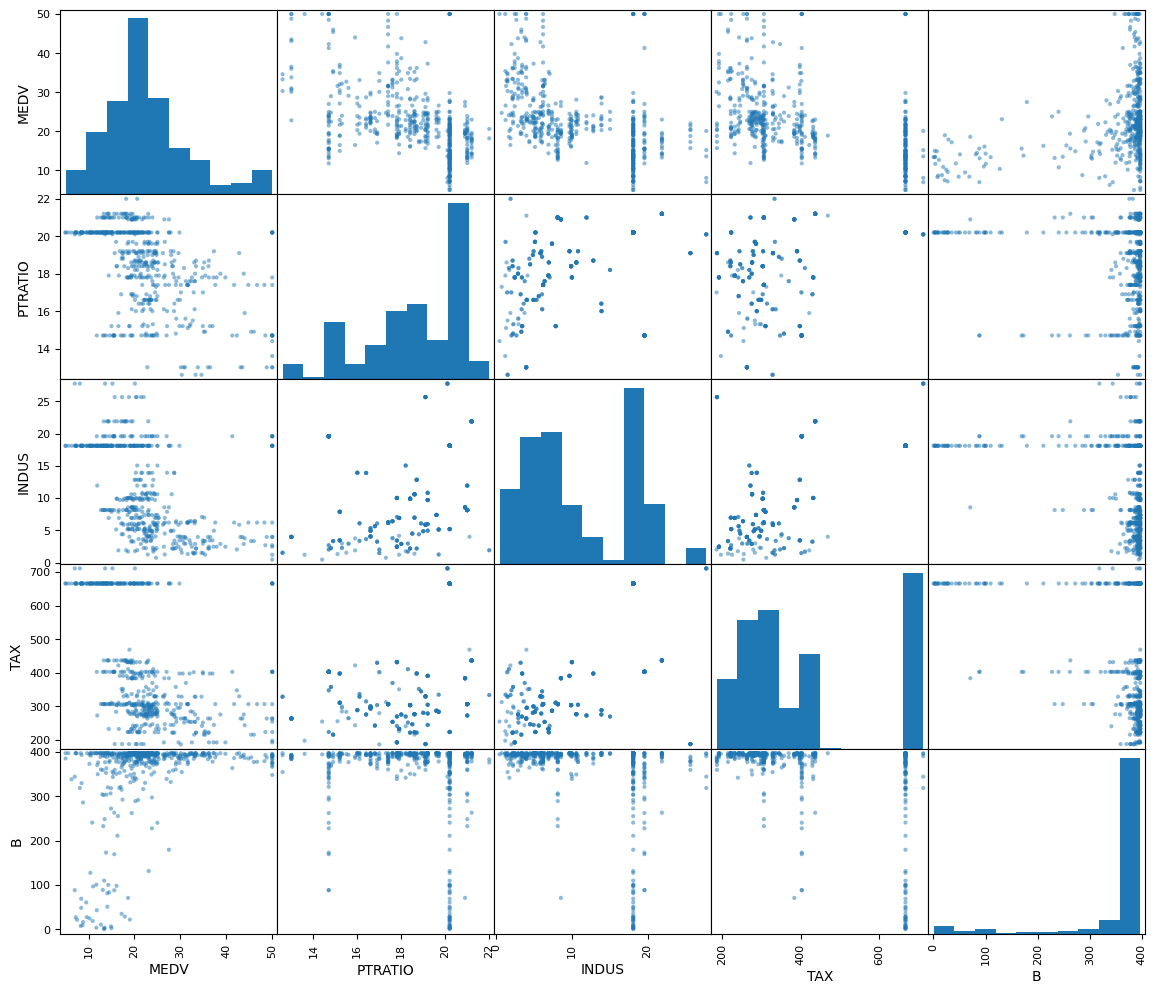

In [45]:
#Represento graficamente las correlciones de alguns otros features.

otherAtributes = ['MEDV','PTRATIO','INDUS','TAX','B']
scatter_matrix(data[otherAtributes], figsize=(14,12))
plt.show()

In [46]:
#Duplico el conjunto de datos para manipular
dataTransformed = data.copy()

In [47]:
#Como la distribucion tiene una cola hacia la derecha, tomo como cota superior el valor en el que se encuentran
#el 90% de los datos.
upperCRIM = dataTransformed['CRIM'].quantile(0.9)
dataTransformed = dataTransformed[dataTransformed['CRIM'] <= upperCRIM]

In [48]:
#Como la distribucion tiene una cola hacia la derecha, tomo como cota superior el valor en el que se encuentran
#el 90% de los datos.
upperZN = dataTransformed['ZN'].quantile(0.9)
dataTransformed = dataTransformed[dataTransformed['CRIM'] <= upperCRIM]

In [49]:
#Como la distribucion tiene una cola hacia la izquierda, tomo como cota inferior el valor en el que se encuentran
#el 10% de los datos.
lowerB = dataTransformed['B'].quantile(0.1)
dataTransformed = dataTransformed[dataTransformed['B'] >= lowerB]

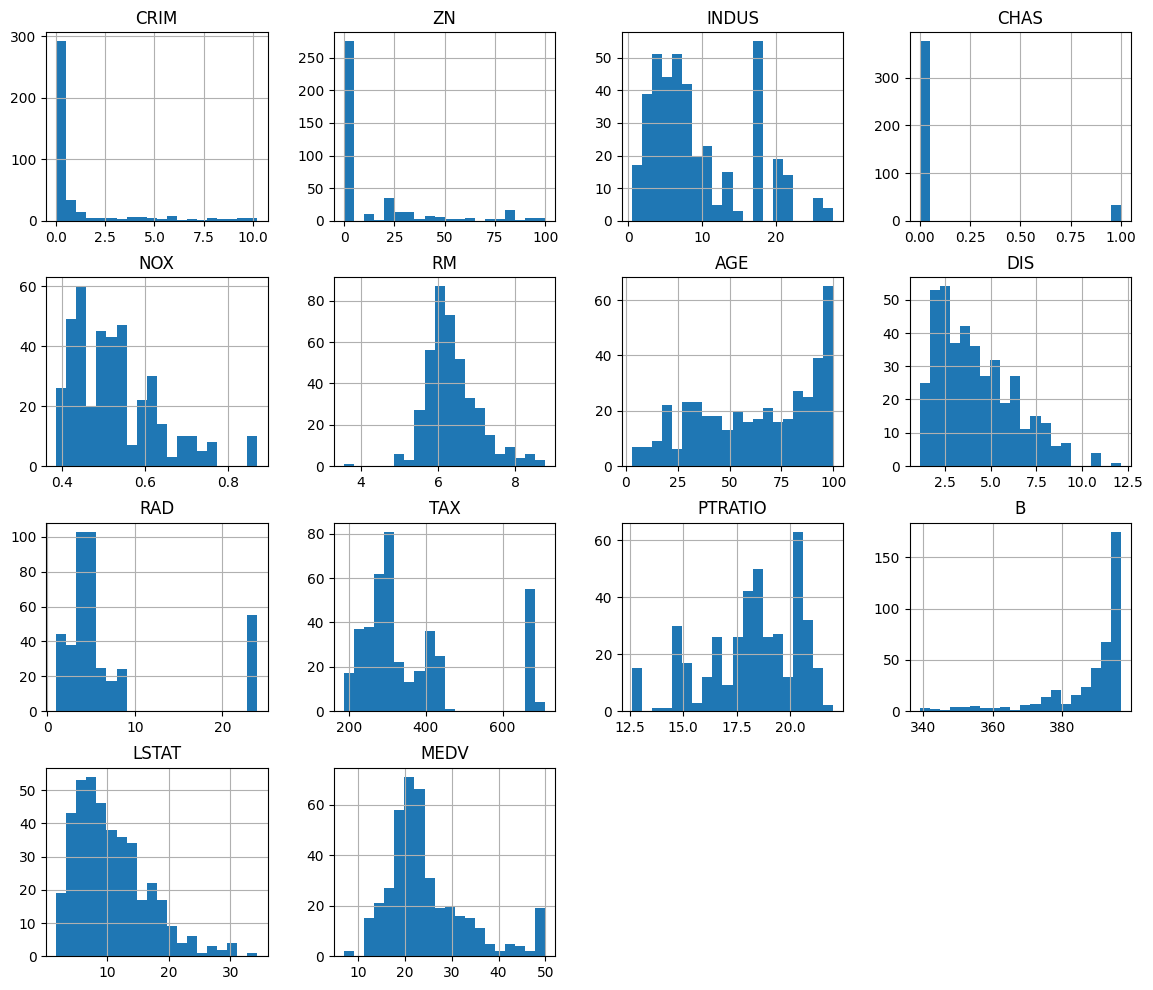

In [50]:
#Grafico histogramas para ver como quedan las distribuciones luego de las transformaciones
dataTransformed.hist(bins=20, figsize=(14,12))
plt.show()

In [51]:
dataTransformed.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000
mean,1.128242,14.058680,9.577579,0.080685,0.527474,6.376912,63.275306,4.216832,7.066015,360.278729,18.181907,388.107433,10.765844,24.585575
std,2.267326,25.204633,6.607239,0.272684,0.106337,0.680091,28.334030,2.111177,6.861590,141.269613,2.156742,12.126326,5.864664,8.757272
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,338.920000,1.730000,7.000000
25%,0.064660,0.000000,4.390000,0.000000,0.442900,5.936000,38.300000,2.463100,4.000000,273.000000,16.800000,385.640000,6.360000,19.300000
50%,0.154450,0.000000,7.380000,0.000000,0.507000,6.250000,67.200000,3.788600,5.000000,307.000000,18.500000,392.900000,9.550000,22.500000
75%,0.614700,20.000000,13.920000,0.000000,0.583000,6.715000,90.400000,5.560500,6.000000,403.000000,20.200000,396.900000,14.100000,28.100000
max,10.233000,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.410000,50.000000


In [52]:
#MEDV es una variable continua, por lo que no considero necesario aplicar estratificacion
train_set, test_set = train_test_split(data, test_size=0.2, random_state=23)
t_train_set, t_test_set = train_test_split(dataTransformed, test_size=0.2, random_state=23)

In [53]:
x_train = train_set.drop('MEDV', axis=1)
t_x_train = t_train_set.drop('MEDV', axis=1)

In [54]:
y_train = train_set['MEDV'].copy()
t_y_train = t_train_set['MEDV'].copy()

In [55]:
#Entreno el primer modelo (Regresion Lineal) usando CrossValidation.
print('LINEAR REGRESION')
print()

lregPipeline = Pipeline([
    ('linear_regression', LinearRegression())
])

lregRMSE = -cross_val_score(lregPipeline, x_train, y_train, scoring="neg_root_mean_squared_error", cv=5)

print('Resultados RMSE CrossValidation:')
print('--------------------------------')
print('Mean lregRMSE:', lregRMSE.mean())
print('Std lregRMSE:', lregRMSE.std())
print()

lregPipeline.fit(x_train, y_train)
lregModel = lregPipeline
y_pred = lregModel.predict(x_train)

print('Resultados RMSE conjunto Train:')
print('--------------------------------')
print('lregRMSE:', np.sqrt(mean_squared_error(y_train, y_pred)))

LINEAR REGRESION

Resultados RMSE CrossValidation:
--------------------------------
Mean lregRMSE: 4.935461985763551
Std lregRMSE: 0.14738792389197672

Resultados RMSE conjunto Train:
--------------------------------
lregRMSE: 4.692748087863405


In [56]:
#Tomo el conjunto de datos sin outliers y entreno nuevamente el modelo de Linear Regression, ahora haciendo escalado de los datos.
print('LINEAR REGRESION (SIN OUTLIERS/ESCALADO)')
print()

scalerlregPipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('linear_regression', LinearRegression())
])

scalerlregRMSE = -cross_val_score(scalerlregPipeline, t_x_train, t_y_train, scoring="neg_root_mean_squared_error", cv=5)

print('Resultados RMSE CrossValidation:')
print('--------------------------------')
print('Mean lregRMSE:', scalerlregRMSE.mean())
print('Std lregRMSE:', scalerlregRMSE.std())
print()

scalerlregPipeline.fit(t_x_train, t_y_train)
scalerlregModel = scalerlregPipeline
t_y_pred = scalerlregModel.predict(t_x_train)

print('Resultados RMSE conjunto Train:')
print('--------------------------------')
print('lregRMSE:', np.sqrt(mean_squared_error(t_y_train, t_y_pred)))

LINEAR REGRESION (SIN OUTLIERS/ESCALADO)

Resultados RMSE CrossValidation:
--------------------------------
Mean lregRMSE: 5.415431865799058
Std lregRMSE: 0.9927179445515255

Resultados RMSE conjunto Train:
--------------------------------
lregRMSE: 4.739862175431126


In [57]:
#Pruebo ahora con Random Forest.
RANDOM_STATE = 23

print('RANDOM FOREST')
print()

forestPipeline = Pipeline([
    ('random_forest', RandomForestRegressor(random_state=RANDOM_STATE))
])

forestRMSE = -cross_val_score(forestPipeline, x_train, y_train, scoring = 'neg_root_mean_squared_error', cv = 5)

print('Resultados RMSE CrossValidation:')
print('--------------------------------')
print('Mean lregRMSE:', forestRMSE.mean())
print('Std lregRMSE:', forestRMSE.std())
print()

forestPipeline.fit(x_train, y_train)
forestModel = forestPipeline
y_pred = forestModel.predict(x_train)

print('Resultados RMSE conjunto Train:')
print('--------------------------------')
print('lregRMSE:', np.sqrt(mean_squared_error(y_train, y_pred)))

RANDOM FOREST

Resultados RMSE CrossValidation:
--------------------------------
Mean lregRMSE: 3.0088046687278536
Std lregRMSE: 0.1604295337123014

Resultados RMSE conjunto Train:
--------------------------------
lregRMSE: 1.1060398852314375


In [58]:
#Pruebo ahora con Gradient Boosting con una combinacion dada de hiperparametros
print('GRADIENT BOOSTING')
print()

gbrtPipeline = Pipeline([
    ('gradient_boosting', GradientBoostingRegressor(random_state=RANDOM_STATE, n_iter_no_change=10, learning_rate=0.05, n_estimators=1000))
])

gbrtRMSE = -cross_val_score(gbrtPipeline, x_train, y_train, scoring = 'neg_root_mean_squared_error', cv = 5)

print('Resultados RMSE CrossValidation:')
print('--------------------------------')
print('Mean lregRMSE:', gbrtRMSE.mean())
print('Std lregRMSE:', gbrtRMSE.std())
print()

gbrtPipeline.fit(x_train, y_train)
gbrtModel = gbrtPipeline
y_pred = gbrtModel.predict(x_train)

print('Resultados RMSE conjunto Train:')
print('--------------------------------')
print('lregRMSE:', np.sqrt(mean_squared_error(y_train, y_pred)))

GRADIENT BOOSTING

Resultados RMSE CrossValidation:
--------------------------------
Mean lregRMSE: 3.0793010760382837
Std lregRMSE: 0.151767970146659

Resultados RMSE conjunto Train:
--------------------------------
lregRMSE: 1.4426635450462189


In [81]:
#Pruebo con Linear Regression con transformacion polinomica (regresion no lineal)
print('POLINOMICAL REGRESSION')
print()

polyregPipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    LinearRegression()
)

poliregRMSE = -cross_val_score(polyregPipeline, x_train, y_train, scoring = 'neg_root_mean_squared_error', cv = 5)

print('Resultados RMSE CrossValidation:')
print('--------------------------------')
print('Mean lregRMSE:', poliregRMSE.mean())
print('Std lregRMSE:', poliregRMSE.std())
print()

polyregPipeline.fit(x_train, y_train)
polyregModel = polyregPipeline
y_pred = polyregModel.predict(x_train)

print('Resultados RMSE conjunto Train:')
print('--------------------------------')
print('lregRMSE:', np.sqrt(mean_squared_error(y_train, y_pred)))

POLINOMICAL REGRESSION

Resultados RMSE CrossValidation:
--------------------------------
Mean lregRMSE: 3.8112135547954127
Std lregRMSE: 0.25156204281109473

Resultados RMSE conjunto Train:
--------------------------------
lregRMSE: 2.2398068422248243


In [82]:
#Pruebo con Linear Regression con transformacion polinomica (regresion no lineal) sin outliers
print('POLINOMICAL REGRESSION (SIN OUTLIERS)')
print()

polyregPipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    LinearRegression()
)

poliregRMSE = -cross_val_score(polyregPipeline, t_x_train, t_y_train, scoring = 'neg_root_mean_squared_error', cv = 5)

print('Resultados RMSE CrossValidation:')
print('--------------------------------')
print('Mean lregRMSE:', poliregRMSE.mean())
print('Std lregRMSE:', poliregRMSE.std())
print()

polyregPipeline.fit(t_x_train, t_y_train)
polyregModel_alt = polyregPipeline
t_y_pred = polyregModel.predict(t_x_train)

print('Resultados RMSE conjunto Train:')
print('--------------------------------')
print('lregRMSE:', np.sqrt(mean_squared_error(t_y_train, t_y_pred)))

POLINOMICAL REGRESSION (SIN OUTLIERS)

Resultados RMSE CrossValidation:
--------------------------------
Mean lregRMSE: 4.662902258633581
Std lregRMSE: 0.5173123367631064

Resultados RMSE conjunto Train:
--------------------------------
lregRMSE: 2.6351922865025226


In [61]:
#RandomForest
print('RANDOM FOREST (TUNEO DE HIPERPARAMETROS)')
print()

forestPipeline = Pipeline([
    ('random_forest', RandomForestRegressor(n_jobs=-1, random_state=RANDOM_STATE))
])

param_dist = {'random_forest__n_estimators': randint(400, 1000),
              'random_forest__max_depth': randint(1,10),
              'random_forest__min_samples_split': randint(2, 5),
              'random_forest__min_samples_leaf': randint(1, 5),
              'random_forest__max_leaf_nodes': randint(2,20),
              'random_forest__bootstrap': [True, False]
             }

forestRND = RandomizedSearchCV(forestPipeline, param_distributions=param_dist, n_iter=20, cv=5, scoring='neg_root_mean_squared_error', random_state=RANDOM_STATE)

forestRND.fit(x_train, y_train)

#Obtengo el mejor resultado junto con la combinacion de hiperparametros.
cv_results = forestRND.cv_results_

min_index = np.argmin(-cv_results['mean_test_score'])
min_score = cv_results['mean_test_score'][min_index]
min_params = cv_results['params'][min_index]

print('Resultado RandomizedSearch:')
print('-----------------------------')
print(f"Score: {-min_score:.4f}, Parameters: {min_params}")

y_pred = forestRND.predict(x_train)

forestRMSE = np.sqrt(mean_squared_error(y_train, y_pred))
print('Resultados conjunto Train')
print('-----------------------------')
print('forestRMSE:', forestRMSE)

RANDOM FOREST (TUNEO DE HIPERPARAMETROS)

Resultado RandomizedSearch:
-----------------------------
Score: 3.2231, Parameters: {'random_forest__bootstrap': True, 'random_forest__max_depth': 9, 'random_forest__max_leaf_nodes': 15, 'random_forest__min_samples_leaf': 1, 'random_forest__min_samples_split': 4, 'random_forest__n_estimators': 943}
Resultados conjunto Train
-----------------------------
forestRMSE: 2.332104614147071


In [62]:
#Gradient Boosting
print('GRADIENT BOOSTING (TUNEO DE HIPERPARAMETROS)')
print()

gbrtPipeline = Pipeline([
    ('gradient_boosting', GradientBoostingRegressor(random_state=RANDOM_STATE, n_iter_no_change=10))
])

param_dist = {'gradient_boosting__n_estimators': randint(800, 2000),
              'gradient_boosting__max_depth': randint(1,5),
              'gradient_boosting__min_samples_leaf': randint(1, 5),
              'gradient_boosting__learning_rate': [0.001,0.01,0.1,0.005,0.05,0.5]
             }

gbrtRND = RandomizedSearchCV(gbrtPipeline, param_dist, n_iter=20, cv=5, scoring='neg_root_mean_squared_error', random_state=RANDOM_STATE)

gbrtRND.fit(x_train, y_train)

#Obtengo el mejor resultado junto con la combinacion de hiperparametros.
cv_results = gbrtRND.cv_results_

min_index = np.argmin(-cv_results['mean_test_score'])
min_score = cv_results['mean_test_score'][min_index]
min_params = cv_results['params'][min_index]

print('Resultado RandomizedSearch:')
print('-----------------------------')
print(f"Score: {-min_score:.4f}, Parameters: {min_params}")

y_pred = gbrtRND.predict(x_train)

gbrtRMSE = np.sqrt(mean_squared_error(y_train, y_pred))
print('Resultados conjunto Train')
print('-----------------------------')
print('forestRMSE:', gbrtRMSE)

GRADIENT BOOSTING (TUNEO DE HIPERPARAMETROS)

Resultado RandomizedSearch:
-----------------------------
Score: 3.0191, Parameters: {'gradient_boosting__learning_rate': 0.1, 'gradient_boosting__max_depth': 3, 'gradient_boosting__min_samples_leaf': 1, 'gradient_boosting__n_estimators': 1437}
Resultados conjunto Train
-----------------------------
forestRMSE: 1.3154323786563504


In [63]:
#Hago un Ensamble de los dos mejores modelos.
print('ENSAMBLE')
print()

stackReg = StackingRegressor(
    estimators=[
        ('gbrt', gbrtRND),
        ('forest', forestRND)
    ],
    cv = 5
)

stackReg.fit(x_train, y_train)
y_pred = stackReg.predict(x_train)
stackRMSE = np.sqrt(mean_squared_error(y_train, y_pred))
print('stackRMSE:', stackRMSE)

ENSAMBLE

stackRMSE: 1.6089313501708689


In [64]:
x_test = test_set.drop('MEDV', axis=1)
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
176,0.07022,0.0,4.05,0.0,0.510,6.020,47.2,3.5549,5.0,296.0,16.6,393.23,10.11
311,0.79041,0.0,9.90,0.0,0.544,6.122,52.8,2.6403,4.0,304.0,18.4,396.90,5.98
94,0.04294,28.0,15.04,0.0,0.464,6.249,77.3,3.6150,4.0,270.0,18.2,396.90,10.59
139,0.54452,0.0,21.89,0.0,0.624,6.151,97.9,1.6687,4.0,437.0,21.2,396.90,18.46
232,0.57529,0.0,6.20,0.0,0.507,8.337,73.3,3.8384,8.0,307.0,17.4,385.91,2.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,0.07244,60.0,1.69,0.0,0.411,5.884,18.5,10.7103,4.0,411.0,18.3,392.33,7.79
91,0.03932,0.0,3.41,0.0,0.489,6.405,73.9,3.0921,2.0,270.0,17.8,393.55,8.20
320,0.16760,0.0,7.38,0.0,0.493,6.426,52.3,4.5404,5.0,287.0,19.6,396.90,7.20
376,15.28800,0.0,18.10,0.0,0.671,6.649,93.3,1.3449,24.0,666.0,20.2,363.02,23.24


In [65]:
y_test = test_set['MEDV'].copy()
y_test

176    23.2
311    22.1
94     20.6
139    17.8
232    41.7
       ... 
352    18.6
91     22.0
320    23.8
376    13.9
108    19.8
Name: MEDV, Length: 102, dtype: float64

In [125]:
#Linear Regression
y_pred = lregModel.predict(x_test)
lregRMSE_test = np.sqrt(mean_squared_error(y_test, y_pred))

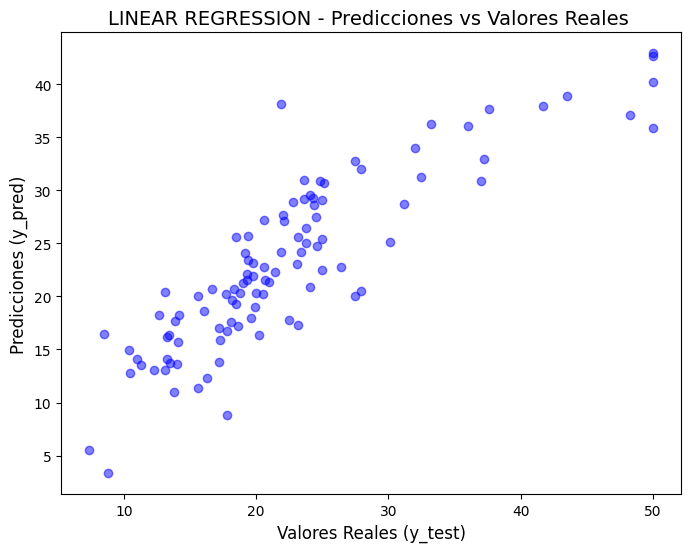

In [126]:
#Grafico predicciones vs valores reales
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)

plt.title("LINEAR REGRESSION - Predicciones vs Valores Reales ", fontsize=14)
plt.xlabel("Valores Reales (y_test)", fontsize=12)
plt.ylabel("Predicciones (y_pred)", fontsize=12)

plt.show()

In [127]:
#Ensamble
y_pred = stackReg.predict(x_test)
stackRMSE_test = np.sqrt(mean_squared_error(y_test, y_pred))

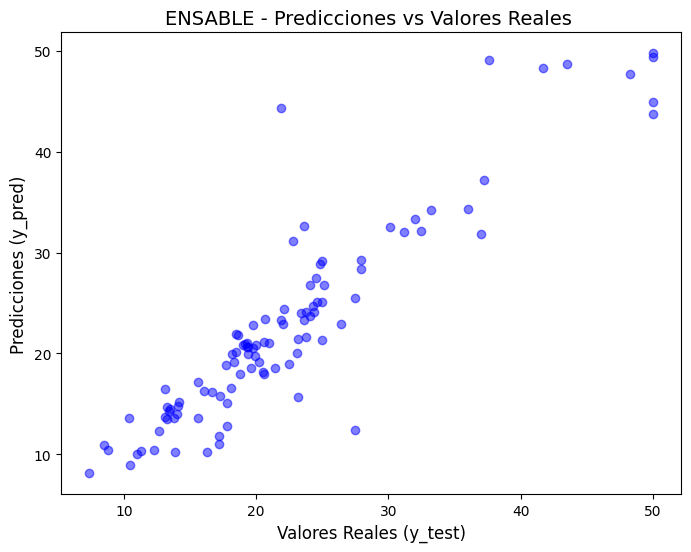

In [128]:
#Grafico predicciones vs valores reales
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)

plt.title("ENSABLE - Predicciones vs Valores Reales ", fontsize=14)
plt.xlabel("Valores Reales (y_test)", fontsize=12)
plt.ylabel("Predicciones (y_pred)", fontsize=12)

plt.show()

In [129]:
#Gradient Boosting (Tunning)
y_pred = gbrtRND.predict(x_test)
gbrtRMSE_test = np.sqrt(mean_squared_error(y_test, y_pred))

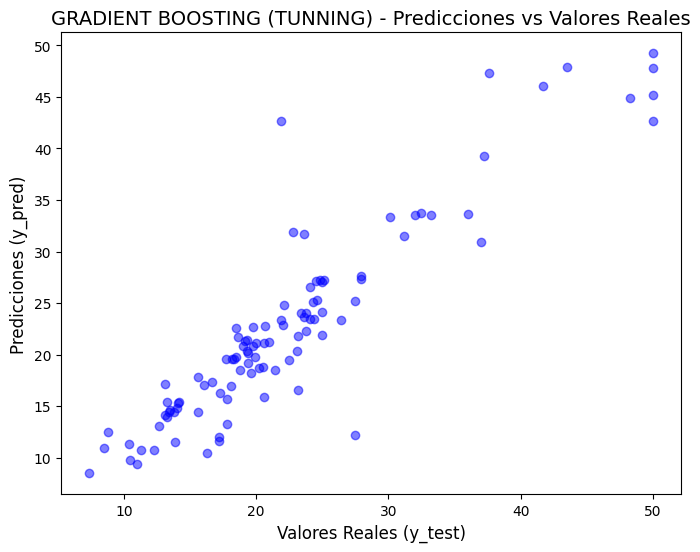

In [130]:
#Grafico predicciones vs valores reales
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)

plt.title("GRADIENT BOOSTING (TUNNING) - Predicciones vs Valores Reales", fontsize=14)
plt.xlabel("Valores Reales (y_test)", fontsize=12)
plt.ylabel("Predicciones (y_pred)", fontsize=12)

plt.show()

In [131]:
#Random Forest (Tunning)
y_pred = forestRND.predict(x_test)
forestRMSE_test = np.sqrt(mean_squared_error(y_test, y_pred))

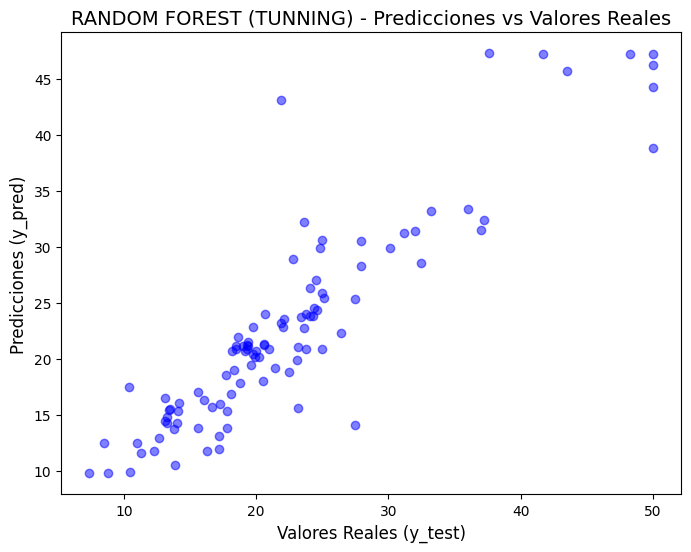

In [132]:
#Grafico predicciones vs valores reales
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)

plt.title("RANDOM FOREST (TUNNING) - Predicciones vs Valores Reales", fontsize=14)
plt.xlabel("Valores Reales (y_test)", fontsize=12)
plt.ylabel("Predicciones (y_pred)", fontsize=12)

plt.show()

In [133]:
#Polynomical Regression
y_pred = polyregModel.predict(x_test)
polyregRMSE_test = np.sqrt(mean_squared_error(y_test,y_pred))

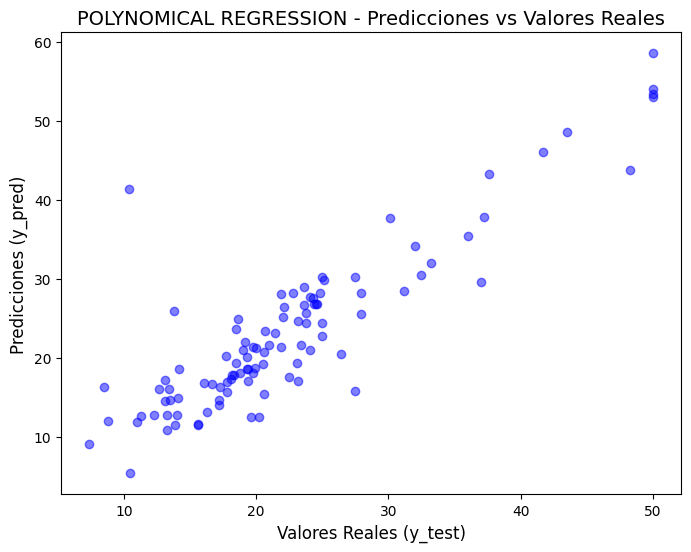

In [134]:
#Grafico predicciones vs valores reales
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)

plt.title("POLYNOMICAL REGRESSION - Predicciones vs Valores Reales", fontsize=14)
plt.xlabel("Valores Reales (y_test)", fontsize=12)
plt.ylabel("Predicciones (y_pred)", fontsize=12)

plt.show()

In [135]:
# Random Forest (No Tunning)
y_pred = forestModel.predict(x_test)
forestRMSE_sh_test = np.sqrt(mean_squared_error(y_test,y_pred))

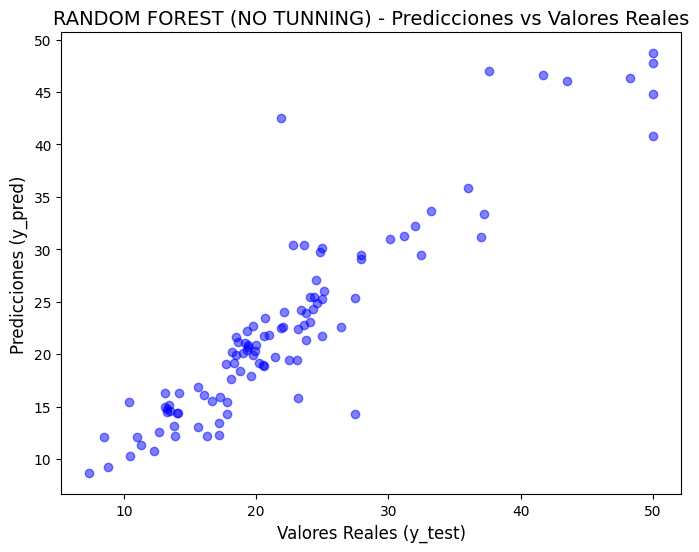

In [136]:
#Grafico predicciones vs valores reales
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)

plt.title("RANDOM FOREST (NO TUNNING) - Predicciones vs Valores Reales", fontsize=14)
plt.xlabel("Valores Reales (y_test)", fontsize=12)
plt.ylabel("Predicciones (y_pred)", fontsize=12)

plt.show()

In [137]:
#Gradient Boosting (No Tunning)
y_pred = gbrtModel.predict(x_test)
gbrt_sh_RMSE_test = np.sqrt(mean_squared_error(y_test,y_pred))

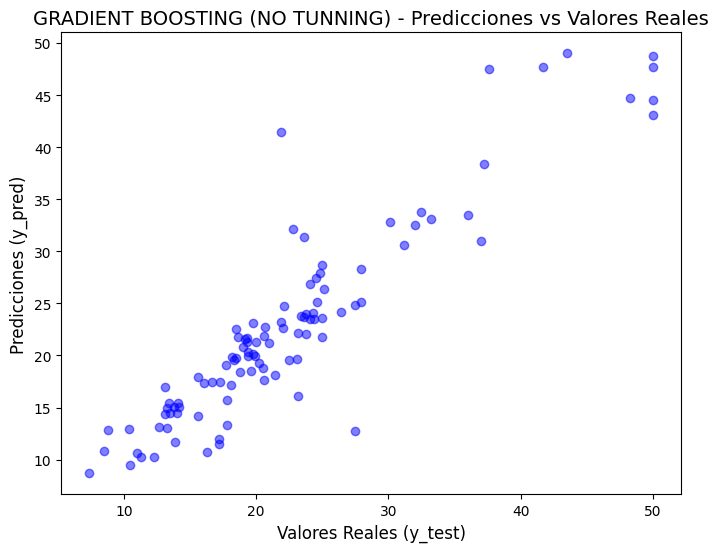

In [138]:
#Grafico predicciones vs valores reales
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)

plt.title("GRADIENT BOOSTING (NO TUNNING) - Predicciones vs Valores Reales", fontsize=14)
plt.xlabel("Valores Reales (y_test)", fontsize=12)
plt.ylabel("Predicciones (y_pred)", fontsize=12)

plt.show()

In [142]:
values = {'Ensamble':stackRMSE_test, 'Gradient Boosting (tunning)': gbrtRMSE_test, 'Random Forest (Tunning)': forestRMSE_test, 'Polynomical Regression': polyregRMSE_test, 'Random Forest (No Tunning)': forestRMSE_sh_test, 'Gradient Boosting (No Tunning)': gbrt_sh_RMSE_test , 'Linear Regression': lregRMSE_test}
df_values = pd.DataFrame(values, index=[0])
print('Tabla de resultados en conjunto de Test')
df_values

Tabla de resultados en conjunto de Test


,Ensamble,Gradient Boosting (tunning),Random Forest (Tunning),Polynomical Regression,Random Forest (No Tunning),Gradient Boosting (No Tunning),Linear Regression
0,4.036486,3.86341,4.014255,4.906979,3.732769,3.859831,4.685453


In [140]:
#Guardo el mejor modelo
joblib.dump(forestModel, 'randomForest.joblib')

['randomForest.joblib']